# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
import os
import sys
import seaborn as sns
from PIL import Image
import pickle

## Helper Functions

In [2]:
%store -r analysis_hf
sys.path.insert(0, analysis_hf)
import nodalStrength as ns
import normalize as norm

# Set Directory Paths

In [3]:
# Directory path to load formatted Pathology Data
%store -r path_dataDir

# Directory path to save Calcualted Analysis Data
%store -r path_CalData

# Directory path to save Figures
%store -r path_Fig

# [1] Loading

## Loading Covariance Matrices (Dropped)

In [4]:
# covTAU_Drop
with open(os.path.join(path_CalData, 'covTAU_Drop.pkl'), 'rb') as f:
    covTAU_Drop = pickle.load(f)
f.close()

# covTDP_Drop
with open(os.path.join(path_CalData, 'covTDP_Drop.pkl'), 'rb') as f:
    covTDP_Drop = pickle.load(f)
f.close()

## Loading path_Tau, path_TDP (Dropped)

In [5]:
# path_TAU_Drop
with open(os.path.join(path_dataDir, 'path_TAU_Drop.pkl'), 'rb') as f:
    path_TAU_Drop = pickle.load(f)
f.close()

# path_TDP_Drop
with open(os.path.join(path_dataDir, 'path_TDP_Drop.pkl'), 'rb') as f:
    path_TDP_Drop = pickle.load(f)
f.close()

# Undo the Log

In [6]:
path_TAU_Drop = np.ma.exp(path_TAU_Drop).filled(np.nan) - 0.00015
path_TDP_Drop = np.ma.exp(path_TDP_Drop).filled(np.nan) - 0.00015

# Normalize each TAU and TDP separately (to range -1, 1)

In [7]:
# Min/Max Range of Normalizing
t_min = -1
t_max = 1

In [8]:
# normalizing TAU EXCLUDING NaN!
path_TAU_Drop_Norm = norm.normalize2d(path_TAU_Drop, t_min, t_max)

In [9]:
# normalizing TDP EXCLUDING NaN!
path_TDP_Drop_Norm = norm.normalize2d(path_TDP_Drop, t_min, t_max)

# [2] Draw Nodal Strength vs Log %AO

In [10]:
pathOrig = np.concatenate((np.nanmean(path_TAU_Drop_Norm, axis=0), 
                           np.nanmean(path_TDP_Drop_Norm, axis=0)))

ymin = np.min(pathOrig)
ymax = np.max(pathOrig)

## TAU

<Figure size 640x480 with 0 Axes>

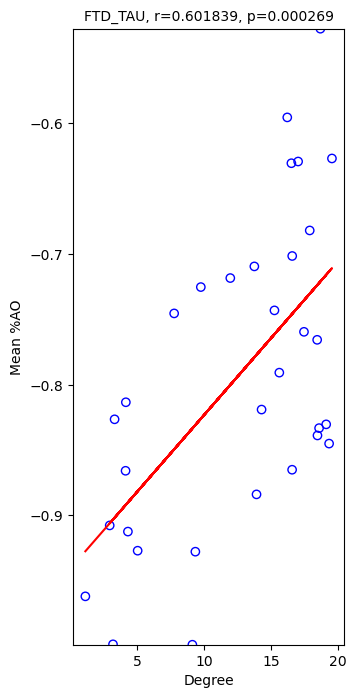

In [11]:
ns.nonZeroDegCorr(path_TAU_Drop_Norm, covTAU_Drop, ymin, ymax,
                  'FTD_TAU', 'Degree', 'Mean %AO', outputDir = path_Fig, outputName = 'FTD_TAU_NodalStrength', linear_regression = True)

## TDP

<Figure size 640x480 with 0 Axes>

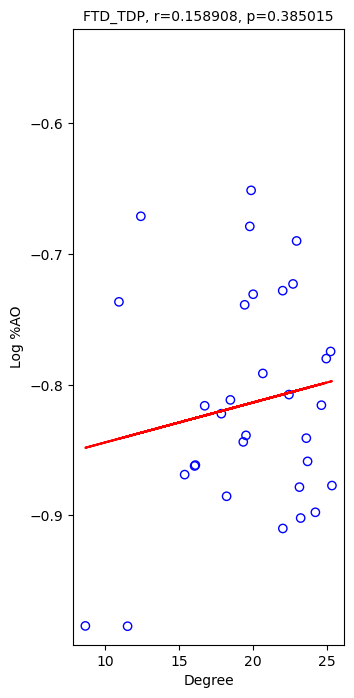

In [12]:
ns.nonZeroDegCorr(path_TDP_Drop_Norm, covTDP_Drop, ymin, ymax,
                  'FTD_TDP', 'Degree', 'Log %AO', outputDir = path_Fig, outputName = 'FTD_TDP_NodalStrength', linear_regression = True)